<a href="https://colab.research.google.com/github/korablev-vm/ScientificPython/blob/main/korablev_vm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Зачетная работа по курсу "Системы компьютерной математики"
##Вариант 33. "Минимизация методом квадратичной интерполяции"



### Задание

Реализовать метод квадратичной интерполяции для нахождения минимума функции, заданной на отрезке.
Привести примеры функций, для которых процесс а) сходится сверхлинейно; б) сходится с линейной скоростью; в) не сходится. 
Программа должна строить графики этих функций, выдавать найденную точку минимума и значение функции в ней и количество вычислений значений функции.

### Важные определения
Под словом *интерполяция* в математике понимают процесс нахождени значений какой-либо функции в некоторой точке по ее значениям в других точках. Слово *интерполяция* восходит к латинскому *interpolatio*, происходящего от глагола *interpolire* ← *inter* (*между*) + *polire* (*шлифовать*, *полировать*). Таким образом, *интерполянт* - эта функция, «сглаживающая» заданные точки.

Если интерполирующая функция - многочлен второго порядка $y = ax^2+bx+c$, то интерполяция называется *квадратичной*. Иногда ее называют *параболической* на отрезке $[x_{i-1},x_{i+1}]$, так как квадратный трёхчлен - это парабола  $y = a_1x^2+b_1x+c_1$, где $a_1,b_1,c_1$ - неизвестные.

### Разработка функции

#### Алгоритм работы
Для того, чтобы разработать функцию, сначала разберемся с алгоритмом, по которому она должна работать:

1. Задаем начальные точки $x_1, x_3$ на отрезке $[a, b]$, и точку $x_2$ в середине отрезка, вычисляем значения функции в этих точках: $fx_1, fx_2, fx_3$.

2. Запускаем цикл, в котором вычисляем коэффициенты $A, B, C$ квадратичной функции, проходящей через точки $(x_1, fx_1), (x_2, fx_2), (x_3, fx_3)$.

3. Находим минимум этой квадратичной функции $x_{min}$, вычисляем значение функции в этой точке $fx_{min}$.

4. Проверяем условие окончания итерационного процесса: если значение $x_{min}$ достаточно близко к $x_2$, то завершаем итерации и возвращаем найденное значение минимума и соответствующее ему значение функции. Если же условие окончания не выполнено, то переходим к шагу 5.

5. Обновляем отрезок $[x1, x3]$ в зависимости от значения $x_{min}$ и $fx_{min}$: если $x_{min}$ находится слева от $x_2$ и значение функции в этой точке меньше $fx_2$, то отбрасываем правый конец отрезка и сохраняем $x_{min}$ и $fx_{min}$ как новый правый конец отрезка; если $x_{min}$ находится слева от $x_2$ и значение функции в этой точке больше или равно $fx_2$, то отбрасываем левый конец отрезка и сохраняем $x_{min}$ и $fx_{min}$ как новый левый конец отрезка; если $x_{min}$ находится справа от $x_2$ и значение функции в этой точке меньше $fx_2$, то отбрасываем левый конец отрезка и сохраняем $x_{min}$ и $fx_{min}$ как новый левый конец отрезка; если $x_{min}$ нэаходится справа от $x_2$ и значение функции в этой точке больше или равно $fx_2$, то отбрасываем правый конец отрезка и сохраняем $x_{min}$ и $fx_{min}$ как новый правый конец отрезка.

6. Повторяем шаги 2-5 до выполнения условия окончания работы цикла, запущенного в п. 2, или до достижения максимального числа итераций.

####Функция на языке Python

In [ ]:
def quadratic_interpolation(f, a, b, tol=0.0001, max_iter=100):
    x1, x3, x2 = a, b, (a+b)/2
    fx1, fx2, fx3 = f(x1), f(x2), f(x3)
    count = 3
    while count < max_iter:
        A = ((fx1 - fx2) / ((x1 - x2) * (x1 - x3))) - ((fx2 - fx3) / ((x2 - x1) * (x2 - x3)))
        B = (fx1 - fx2) / (x1 - x2) - A * (x1 + x2)
        C = fx1 - A * x1**2 - B * x1
        x_min = -B / (2 * A)
        fx_min = f(x_min)
        if abs(x_min - x2) < tol:
            count += 1
            break
        if x_min < x2:
            if fx_min < fx2:
                x3, fx3 = x2, fx2
                x2, fx2 = x_min, fx_min
            else:
                x1, fx1 = x_min, fx_min
        else:
            if fx_min < fx2:
                x1, fx1 = x2, fx2
                x2, fx2 = x_min, fx_min
            else:
                x3, fx3 = x_min, fx_min
        count += 1
    return x_min, fx_min, count

###Примеры работы функции

Уравнение, для которого процесс сходится с линейной скоростью: 
Функция: $|x-1|$

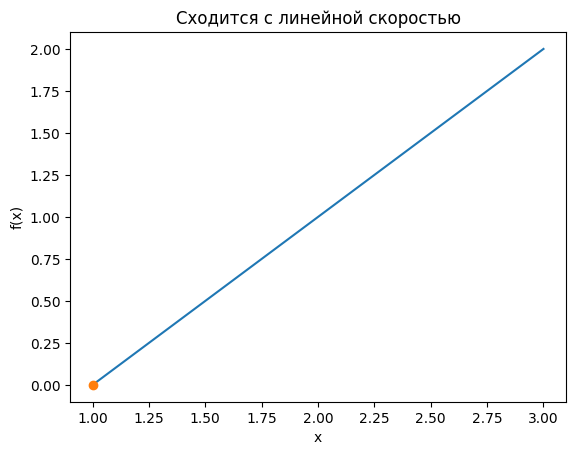

Точка минимума: 1.000300
Значение функции в т. минимума: 0.000300
Количество вычислений: 36


In [ ]:
def f(x):
    return abs(x - 1)
a, b = 1, 3
x_min, fx_min, count = quadratic_interpolation(f, a, b)
x = np.linspace(a, b)
y = f(x)
#Настройка графика
plt.plot(x, y)
plt.plot(x_min, fx_min, 'o')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Сходится с линейной скоростью')
plt.show()
#Вывод результата
print(f'Точка минимума: {x_min:.6f}')
print(f'Значение функции в т. минимума: {fx_min:.6f}')
print("Количество вычислений:", count)

Функция $f(x) = |x-1|$ не имеет гладкой производной (график производной имеет разрыв) в точке x = 1, что делает ее оптимизацию сложной задачей. Поэтому метод квадратичной интерполяции сходится медленно и требует большого количества итераций для достижения необходимого результата.

Уравнение, для которого процесс сходится сверхлинейно: 
Функция: $(x-1)^4$

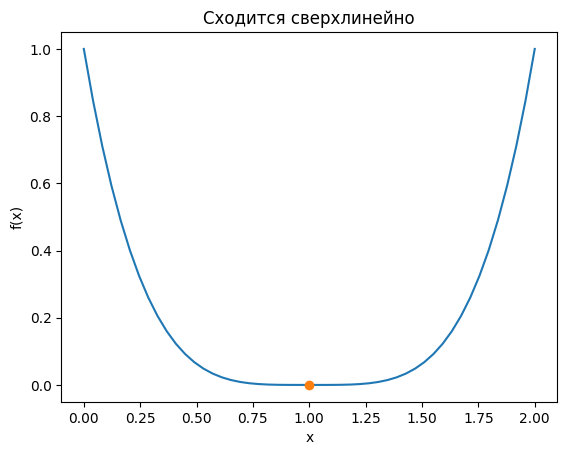

Точка минимума: 0.999947
Значение функции в т. минимума: 0.000000
Количество вычислений: 23


In [ ]:
def f(x):
    return (x - 1)**4
a, b = 0, 2
x_min, fx_min, count = quadratic_interpolation(f, a, b)
x = np.linspace(a, b)
y = f(x)
#Настройка графика
plt.plot(x, y)
plt.plot(x_min, fx_min, 'o')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Сходится сверхлинейно')
plt.show()
#Вывод результатов
print(f'Точка минимума: {x_min:.6f}')
print(f'Значение функции в т. минимума: {fx_min:.6f}')
print("Количество вычислений:", count)

Для функции $f(x) = (x-1)^4$ метод квадратичной интерполяции требует большого количества итераций, так как у нее широкий пик в точке минимума, что приводит к тому, что минимальное значение находится в окрестности пика. Это делает трудным и долгим нахождение точного значения минимума функции, поскольку метод может застрять в окрестности этого пика и потребовать большого количества вычислений функции, чтобы выйти из него.

Уравнение, для которого процесс не сходится: 
Функция: $sin(x)$

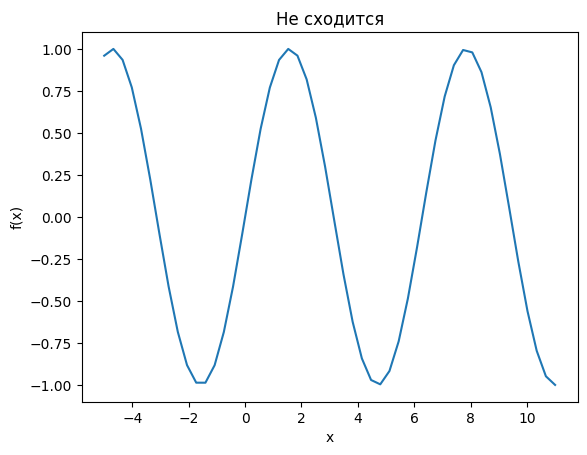

Точка минимума: -53.305575
Значение функции в т. минимума: -0.101326
Количество вычислений: 100


In [ ]:
def f(x):
    return np.sin(x)
a, b = -5, 11
x_min, fx_min, count = quadratic_interpolation(f, a, b)
x = np.linspace(a, b)
y = f(x)
#Настройка графика
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.plot(x_min, fx_min, 'ro', label="Minimum")
plt.title('Не сходится')
plt.show()
#Вывод результатов
print(f'Точка минимума: {x_min:.6f}')
print(f'Значение функции в т. минимума: {fx_min:.6f}')
print("Количество вычислений:", count)

Процесс не сходится для функции $sin(x)$ из-за того, что у нее бесконечное количество минимумов и максимумов, расположенных на расстоянии друг от друга на протяжении всей числовой оси. В связи с этим достигается максимальное количество итераций.

----------------

***В целом, количество итераций можно уменьшить за счет уменьшения допустимого отклонения от минимума функции и(или) отрезка, на котором рассматривается функция.***

###Выводы

В ходе тестирования реализованного метода на различных функциях, можно сделать следующие выводы:

*   Основная идея метода заключается в том, чтобы аппроксимировать функцию на трех точках с помощью квадратичной функции и использовать эту аппроксимацию для нахождения минимума функции на данном отрезке
*   Метод квадратичной интерполяции может сходиться как суперлинейно, так и линейно, но может также не сходиться вообще.
*   На полученный результат влияет не только обрабатываемая функция, но и отрезок, в пределах которого ищется минимум.
*   Количество итераций так же зависит от допустимого отклонения $(tol)$ от минимума функции. 
*   Если функция имеет несколько локальных минимумов на отрезке, то метод может сойтись к любому из них, в зависимости от начальной тройки точек. 
*   Метод квадратичной интерполяции может быть применен к любой функции, для которой возможно вычисление значения в заданной точке.











